In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('https://raw.githubusercontent.com/SowjanyaPatnaik/Data-Science-notes/main/train.csv')

## Explanatory Data Analysis (EDA)

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [7]:
100*df_train.isna().sum()/df_train.shape[0] ##percentage of NA values in our dataset

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Questions to ask:

1. Analyse the distribution in x variable/who were the passengers
2. Analyse the distribution in the Y-variable/understand the distribution in the survived column
3. Analyse the relation between X and Y. Find out which attributes are affecting the Y variable


<AxesSubplot:xlabel='Sex', ylabel='count'>

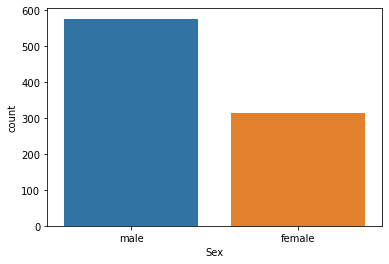

In [9]:
# Distribution in sex column

sns.countplot(x='Sex',data=df_train)


In [10]:
df_train['Sex'].value_counts()/df_train.shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

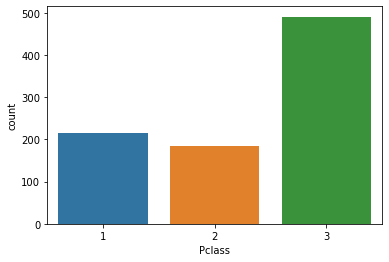

In [11]:
# Distribution in Pclass column
sns.countplot(x='Pclass',data=df_train)

In [12]:
df_train['Pclass'].value_counts()/df_train.shape[0]

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

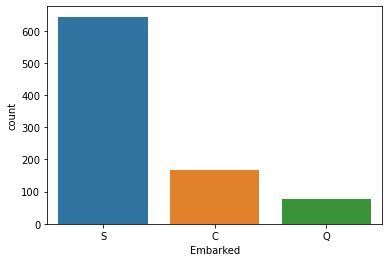

In [13]:
# Distribution in Embarked column
sns.countplot(x='Embarked',data=df_train)

In [14]:
df_train['Embarked'].value_counts()/df_train.shape[0]

S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64

<AxesSubplot:>

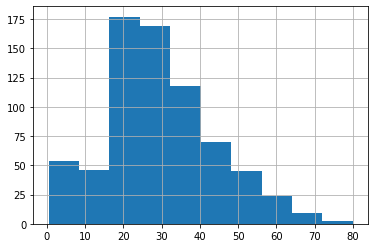

In [15]:
df_train['Age'].hist()

In [16]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

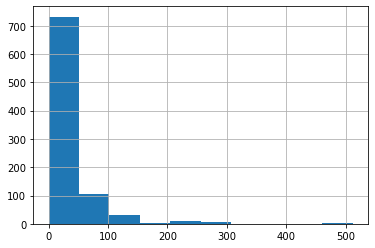

In [17]:
df_train['Fare'].hist()

In [18]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Multivariate Analysis

<AxesSubplot:xlabel='Pclass', ylabel='count'>

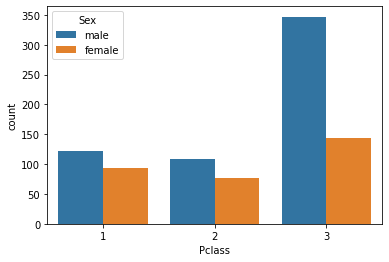

In [19]:
sns.countplot(x='Pclass',data=df_train, hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

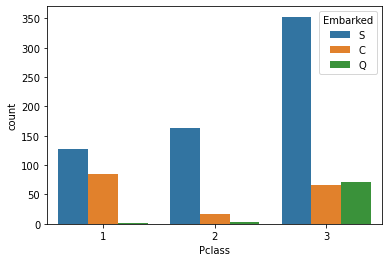

In [20]:
sns.countplot(x='Pclass',data=df_train, hue='Embarked')

In [21]:
for i in df_train['Embarked'].dropna().unique():
    print(f"Passengers Embarked from Port {i}: the distribution is \n {df_train[df_train['Embarked']==i]['Pclass'].
           value_counts()/df_train.shape[0]}")

Passengers Embarked from Port S: the distribution is 
 3    0.396184
2    0.184063
1    0.142536
Name: Pclass, dtype: float64
Passengers Embarked from Port C: the distribution is 
 1    0.095398
3    0.074074
2    0.019080
Name: Pclass, dtype: float64
Passengers Embarked from Port Q: the distribution is 
 3    0.080808
2    0.003367
1    0.002245
Name: Pclass, dtype: float64


In [22]:
df_train['Cabin'].isna().sum()

687

In [23]:
levels=[]

levels = [i[0] for i in df_train['Cabin'].dropna()]

In [24]:
cabin = pd.DataFrame(levels, columns=['Cabin'])

<AxesSubplot:xlabel='Cabin', ylabel='count'>

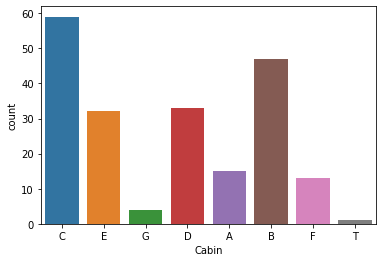

In [25]:
sns.countplot(x='Cabin', data=cabin)

In [26]:
df_train['Alone']=df_train['SibSp'] + df_train['Parch']

In [27]:
df_train['Alone'].loc[df_train['Alone']>0]=='With Family'
df_train['Alone'].loc[df_train['Alone']==0]=='Alone'

2      False
4      False
5      False
6      False
11     False
       ...  
884    False
886    False
887    False
889    False
890    False
Name: Alone, Length: 537, dtype: bool

<AxesSubplot:xlabel='Alone', ylabel='count'>

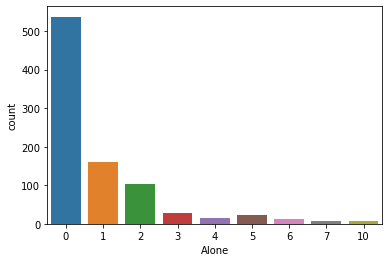

In [28]:
sns.countplot(x='Alone', data=df_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

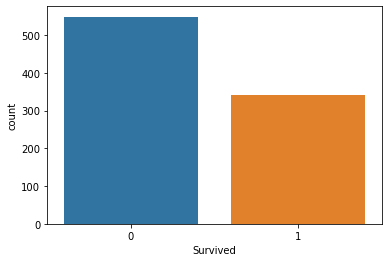

In [29]:
sns.countplot(x='Survived', data=df_train)

In [30]:
df_train['Survived'].value_counts()/df_train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [31]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,0
888,0,3,female,NaN,1,2,23.4500,NaN,S,3
889,1,1,male,26.0,0,0,30.0000,C148,C,0


Text(0, 0.5, 'Probability Density Function')

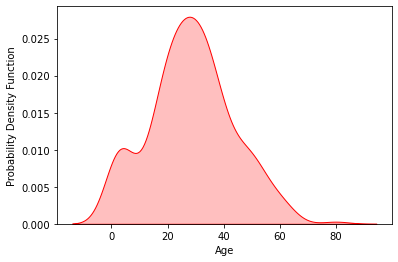

In [32]:
sns.kdeplot(df_train.loc[(df_train['Survived']==1),'Age'], color='r',shade=True) # create kde plot
plt.xlabel('Age')
plt.ylabel('Probability Density Function')

Text(0, 0.5, 'Probability Density Function')

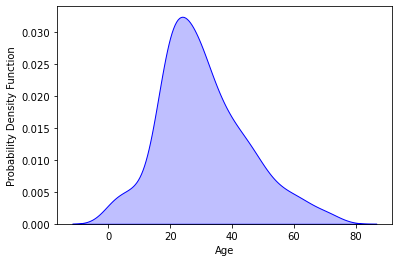

In [33]:
sns.kdeplot(df_train.loc[(df_train['Survived']==0),'Age'], color='b',shade=True)
plt.xlabel('Age')
plt.ylabel('Probability Density Function')

Text(0, 0.5, 'Probability Density Function')

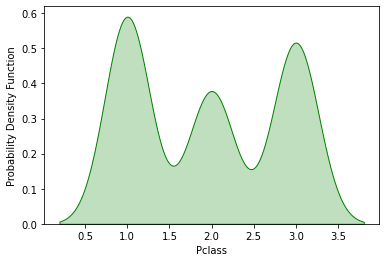

In [34]:
sns.kdeplot(df_train.loc[(df_train['Survived']==1),'Pclass'], color='g',shade=True)
plt.xlabel('Pclass')
plt.ylabel('Probability Density Function')

Text(0, 0.5, 'Probability Density Function')

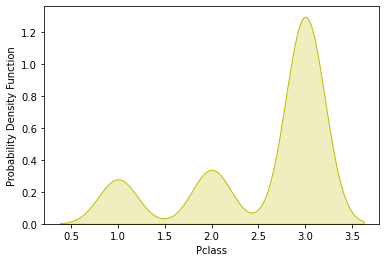

In [35]:
sns.kdeplot(df_train.loc[(df_train['Survived']==0),'Pclass'], color='y',shade=True)
plt.xlabel('Pclass')
plt.ylabel('Probability Density Function')

<AxesSubplot:xlabel='Survived', ylabel='count'>

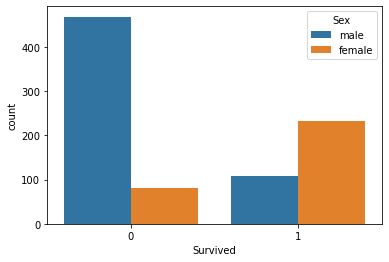

In [36]:
sns.countplot(x='Survived', data=df_train, hue='Sex')

In [37]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,0
888,0,3,female,NaN,1,2,23.4500,NaN,S,3
889,1,1,male,26.0,0,0,30.0000,C148,C,0


In [38]:
def Person(Passenger):
    Sex,Age=Passenger
    if Age<16:
        return 'Child'
    else:
        return Sex

In [39]:
df_train['Person']=df_train[['Sex','Age']].apply(Person, axis=1)

In [40]:
df_train['Person']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Person, Length: 891, dtype: object

<AxesSubplot:xlabel='Person', ylabel='count'>

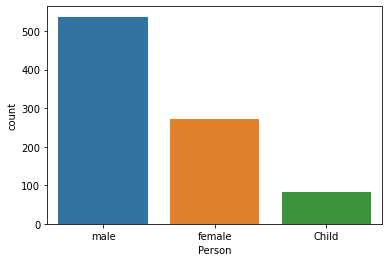

In [41]:
sns.countplot(x='Person', data=df_train)

<AxesSubplot:xlabel='Person', ylabel='count'>

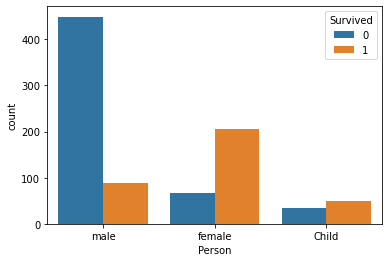

In [42]:
sns.countplot(x='Person', data=df_train, hue='Survived')

### Numerical variables vs categorical 

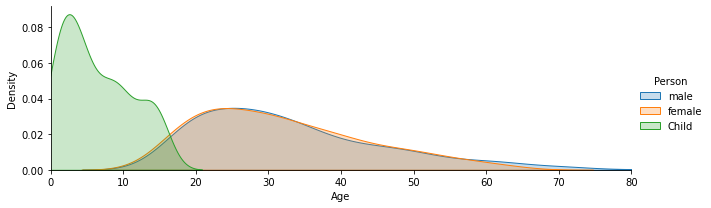

In [43]:
fig=sns.FacetGrid(df_train, hue='Person',aspect=3)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest=df_train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

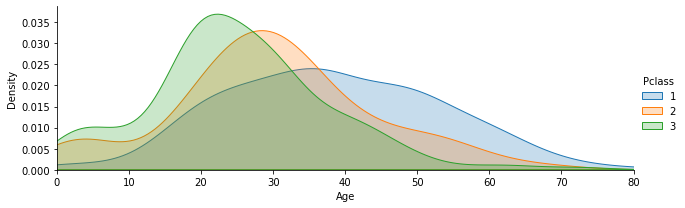

In [44]:
fig=sns.FacetGrid(df_train, hue='Pclass',aspect=3)
fig.map(sns.kdeplot, 'Age',shade=True)

oldest=df_train['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

## Model Building

# Data Cleaning

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [52]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Alone,Person
0,0,3,male,22.0,1,0,7.2500,NaN,S,1,male
1,1,1,female,38.0,1,0,71.2833,C85,C,1,female
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,female
3,1,1,female,35.0,1,0,53.1000,C123,S,1,female
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,male


In [53]:
df_train=df_train.drop(['Alone', 'Person', 'Cabin'],1)

/var/folders/9p/3gwcd46d41q7d9xcxdjth3hh0000gn/T/ipykernel_67670/3383967621.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train=df_train.drop(['Alone', 'Person', 'Cabin'],1)


In [54]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [55]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
df_train['Embarked'].fillna('S',inplace=True)

In [57]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)

In [58]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [59]:
df_train=pd.get_dummies(df_train, drop_first=True)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df_train.drop('Survived',1),df_train['Survived']
                                                  , stratify=df_train['Survived'])

/var/folders/9p/3gwcd46d41q7d9xcxdjth3hh0000gn/T/ipykernel_67670/2865412010.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train, x_test, y_train, y_test=train_test_split(df_train.drop('Survived',1),df_train['Survived']


In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
x_train[['Age','Fare']] = scaler.fit_transform(x_train[['Age','Fare']])
x_test[['Age','Fare']] = scaler.fit_transform(x_test[['Age','Fare']])


In [63]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
235,3,0.027248,0,0,-0.503414,0,0,1
413,2,0.027248,0,0,-0.652975,1,0,1
533,3,0.027248,0,2,-0.210073,0,0,0
505,1,-0.866552,1,0,1.504257,1,0,0
332,1,0.661427,0,1,2.387008,1,0,1
...,...,...,...,...,...,...,...,...
609,1,0.814225,0,0,2.387008,0,0,1
140,3,0.027248,0,2,-0.350966,0,0,0
269,1,0.432230,0,0,2.033824,0,0,1
333,3,-1.019349,2,0,-0.296407,1,0,1


In [64]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(x_train,y_train)
print('Results of the Logistic Regression is : \n')
print(classification_report(y_test,model.predict(x_test)))
print("-----------------***--------------------------------")

model=KNeighborsClassifier()
model.fit(x_train,y_train)
print('Results of the KNN is : \n')
print(classification_report(y_test,model.predict(x_test)))
print("-----------------***--------------------------------")

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print('Results of the Decision Tree is : \n')
print(classification_report(y_test,model.predict(x_test)))
print("-----------------***--------------------------------")

model=RandomForestClassifier()
model.fit(x_train,y_train)
print('Results of the Random Forest is : \n')
print(classification_report(y_test,model.predict(x_test)))
print("-----------------***--------------------------------")

model=SVC()
model.fit(x_train,y_train)
print('Results of the Support vector machine is : \n')
print(classification_report(y_test,model.predict(x_test)))
print("-----------------***--------------------------------")



Results of the Logistic Regression is : 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.78      0.66      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223

-----------------***--------------------------------
Results of the KNN is : 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.79      0.70      0.74        86

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

-----------------***--------------------------------
Results of the Decision Tree is : 

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       137
           1       0.78    